In [31]:
import sys
import os
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import scripts.statistics as stats

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x512x128/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/512x724x256/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr7/256x512x128/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr_7/256x512x128/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc04/rr1/256x512x128/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc04/rr1/1024x1448x512/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc07/rr1/724x1024x362/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/1024x1024x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr7/1024x1024x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr_7/1024x1024x512/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/724x724x256/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/1024x1024x512/'

filename_prefix = directory+'/shearlayer_'
fname = filename_prefix+'gradMach.dat'
dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
n = np.size(dat)

Text(0.5,1,'Mc12/rr1/724x724x256/')

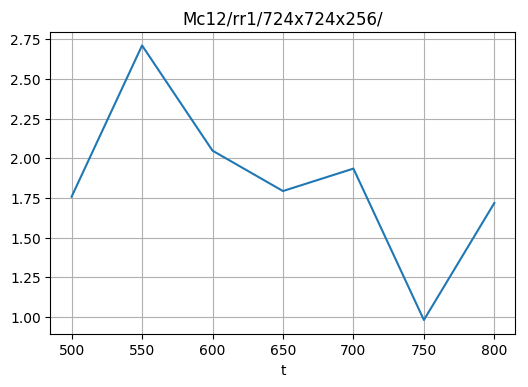

In [36]:

nstats=3
dat = np.reshape(dat,[n/nstats,nstats])
time = dat[:,0]
L = dat[:,1]
Mg = dat[:,2]

# Plotting
plt.figure(dpi=100)
plt.plot(time,Mg,label='M_g centerline'); 
plt.grid(True)
plt.xlabel('t')
plt.title(directory.split('/production/')[-1])


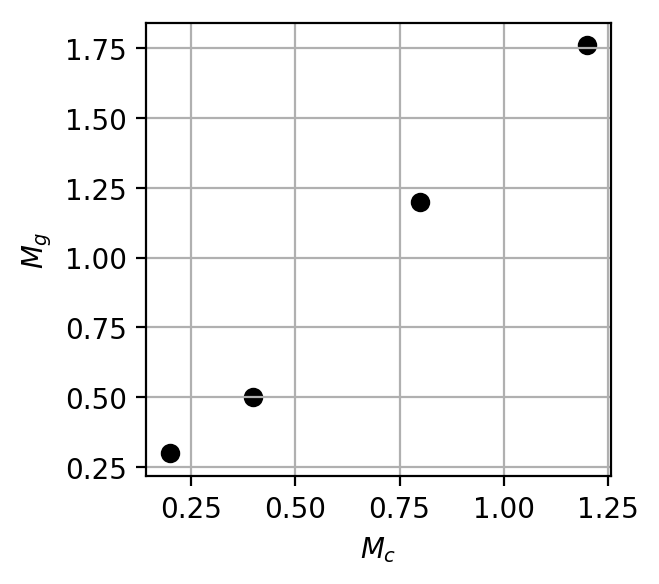

In [37]:
Mg = { 
    0.2:0.3, #512x724
    0.4:0.5, #256x512
    0.8:1.2, #512x724
    1.2:1.76 #724x724
}
fig = plt.figure(figsize=(3,3),dpi=200)
plt.scatter(Mg.keys(),Mg.values(),c='k')

# plt.scatter(Mg.keys(),Mg.values())
plt.xlabel(r'$M_c$')
plt.ylabel(r'$M_g$')
# plt.legend(['Grid I','Grid II'])
plt.grid(True)
